<ipython-input-2-c7db70218683>:75: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


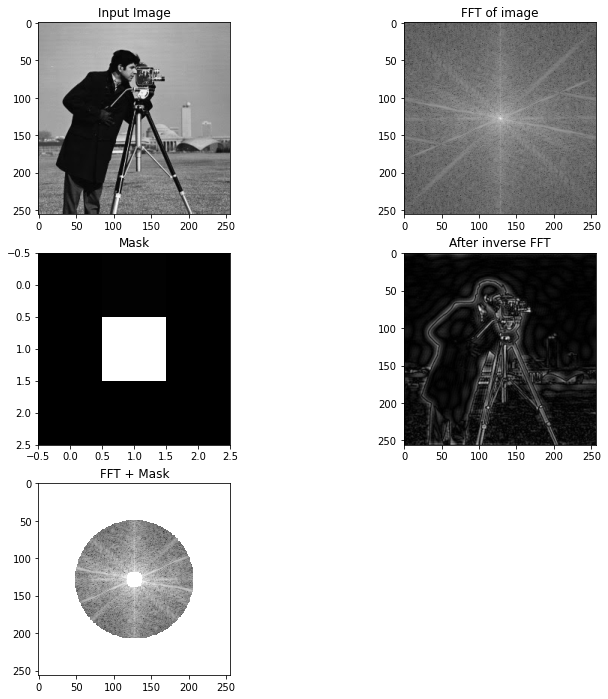

In [2]:
#!/usr/bin/env python


import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('cameraman.jpg', 0) # load an image


dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)


dft_shift = np.fft.fftshift(dft)

 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))



# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1



# apply mask and inverse DFT
fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(3,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')

ax2 = fig.add_subplot(3,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')

ax3 = fig.add_subplot(3,2,5)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')

ax4 = fig.add_subplot(3,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')

kernel_3x3 = np.array([[0, 2, 0],
                       [0, 255, 0],
                       [0, 0, 0]])


ax5 = fig.add_subplot(3,2,3)
ax5.imshow(kernel_3x3, cmap='gray')
ax5.title.set_text('Mask')


plt.show()